In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [75]:
df = pd.read_csv('housing.csv', header=None,delimiter='\s+')
X = df[range(13)]
y = df[13]

Исследуем как зависит точность модели от количества данных

In [52]:
sample_sizes = [0.2, 0.5, 1.0]
real_sizes = []
results_mae = []
results_mse = []
results_r2 = []
for frac in sample_sizes:
    subset = df.sample(frac=frac, random_state=1)
    real_sizes.append(subset.shape[0])
    X = subset.drop(13, axis=1)
    y = subset[13]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results_mae.append(mean_absolute_error(y_test, y_pred))
    results_mse.append(mean_squared_error(y_test, y_pred))
    results_r2.append(r2_score(y_test, y_pred))

Text(0, 0.5, 'MSE')

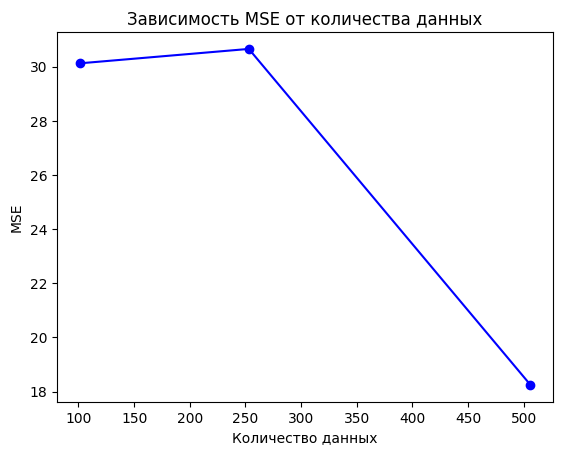

In [53]:
plt.plot(real_sizes, results_mse, 'bo-')
plt.title('Зависимость MSE от количества данных')
plt.xlabel('Количество данных')
plt.ylabel('MSE')

Text(0, 0.5, 'MAE')

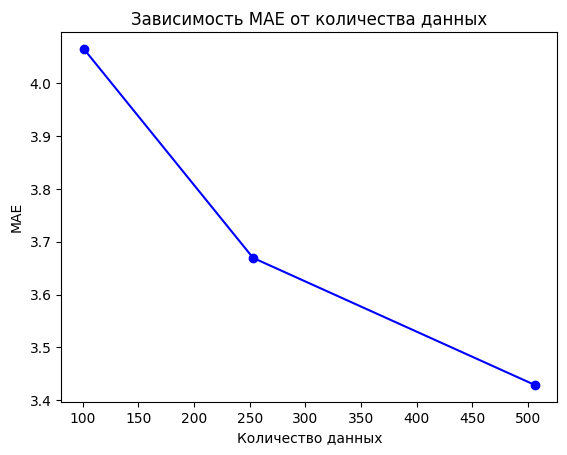

In [54]:
plt.plot(real_sizes, results_mae, 'bo-')
plt.title('Зависимость MAE от количества данных')
plt.xlabel('Количество данных')
plt.ylabel('MAE')

Text(0, 0.5, 'R2')

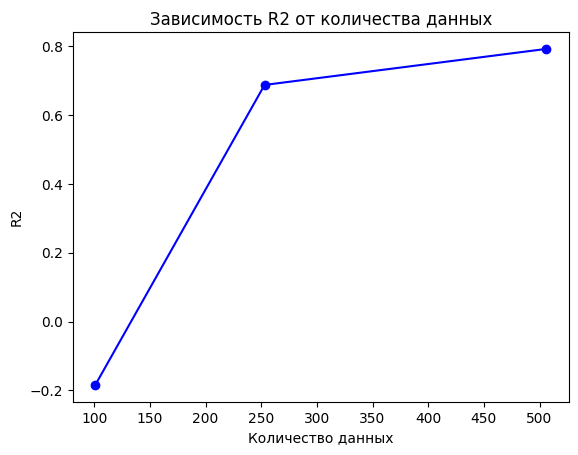

In [55]:
plt.plot(real_sizes, results_r2, 'bo-')
plt.title('Зависимость R2 от количества данных')
plt.xlabel('Количество данных')
plt.ylabel('R2')

Таким образом качество модели увеличивется с ростом количества данных

Исследуем как зависит точность модели от количества признаков

In [70]:
features_2 = [0, 5]
features_7 = [1, 3, 5, 7, 9, 10, 12]
features_13 = df.columns.drop(13)

feature_sets = [features_2, features_7, features_13]
num_features = [2, 7, 13]
results_mae = []
results_mse = []
results_r2 = []

for features in feature_sets:
    X = df[features]
    y = df[13]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results_mae.append(mean_absolute_error(y_test, y_pred))
    results_mse.append(mean_squared_error(y_test, y_pred))
    results_r2.append(r2_score(y_test, y_pred))

Text(0, 0.5, 'MSE')

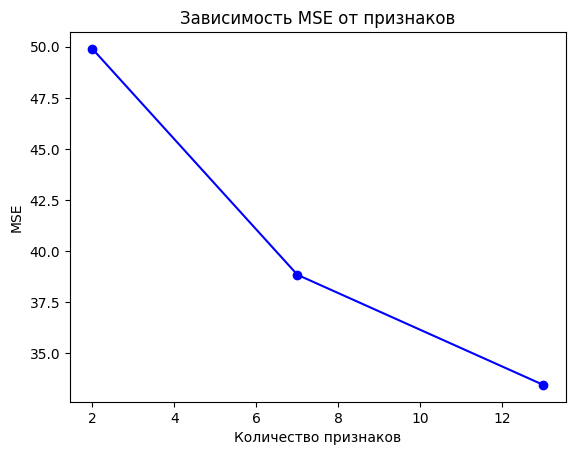

In [71]:
plt.plot(num_features, results_mse, 'bo-')
plt.title('Зависимость MSE от признаков')
plt.xlabel('Количество признаков')
plt.ylabel('MSE')

Text(0, 0.5, 'MAE')

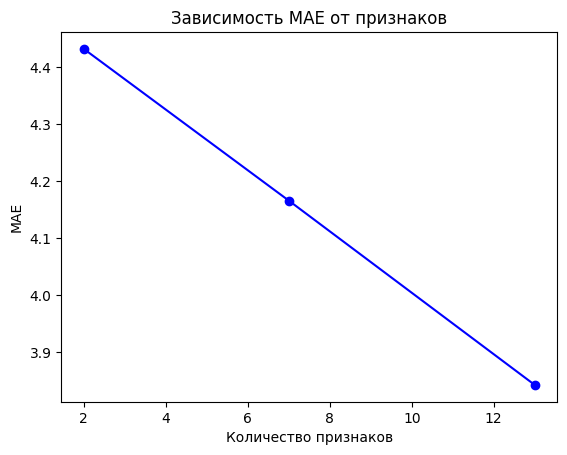

In [72]:
plt.plot(num_features, results_mae, 'bo-')
plt.title('Зависимость MAE от признаков')
plt.xlabel('Количество признаков')
plt.ylabel('MAE')

Text(0, 0.5, 'R2')

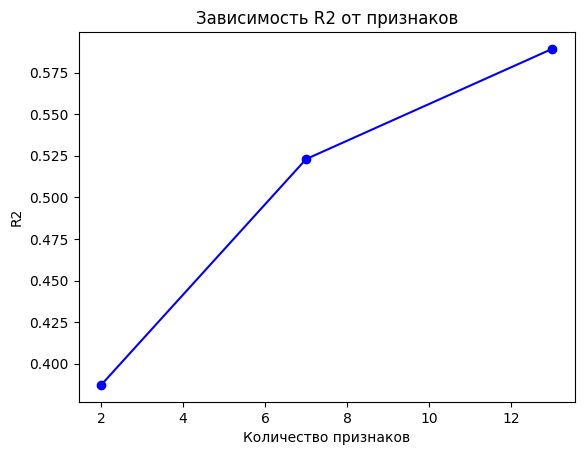

In [73]:
plt.plot(num_features, results_r2, 'bo-')
plt.title('Зависимость R2 от признаков')
plt.xlabel('Количество признаков')
plt.ylabel('R2')

Таким образом чем больше признаков, тем лучше качество модели.

Постром модель с 2 признаками. Используя Matplotlib отрисуем в 3Д режиме данные и полученную плоскость решения.

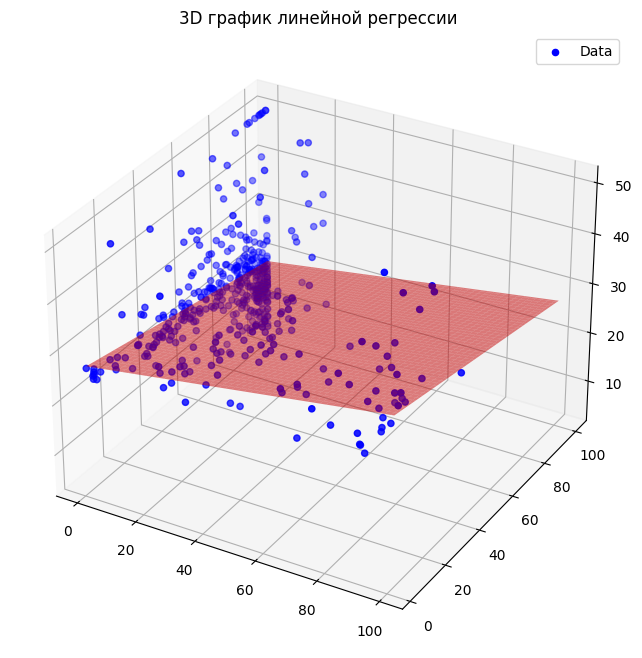

In [43]:
X = df[[1, 6]]
y = df[13]
model = LinearRegression()
model.fit(X, y)

x_surf, y_surf = np.meshgrid(
    np.linspace(X[1].min(), X[1].max(), 100),
    np.linspace(X[6].min(), X[6].max(), 100)
)
z_surf = model.intercept_ + model.coef_[0]*x_surf + model.coef_[1]*y_surf

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[1], X[6], y, c='blue', label='Data')
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)
plt.title("3D график линейной регрессии")
plt.legend()
plt.show()
